# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# read training data and pre-processing

In [2]:
rawData = pd.read_csv('2016_properties_60000v2_train_withFilteredPrice.csv')
trainData = rawData.dropna()

yearList = [d.split('/')[2] for d in trainData.last_sold_date]

trainData['Year']=[int(i) for i in yearList]
#trainData['propertycountylandusecode'] = [int(i) for i in trainData.propertycountylandusecode]

print(trainData.columns)

X1 = trainData[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'latitude', 'longitude', 'lotsizesquarefeet',
       # 'propertycountylandusecode', 'propertyzoningdesc', 
                'rawcensustractandblock',
       'regionidcity', 'regionidzip', 'roomcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'censustractandblock',
       'heating1', 'heating2', 'heating3',
       'quality1', 'quality2', 'quality3',
       'quality4', 'Year']] # 23 attibutes in total

X2 = X1.values

Y = trainData['last_sold_price'].values

print(X2[0:5])
print(Y[0])

scaler = StandardScaler()
scaler.fit(X2)
X = scaler.transform(X2)
print(X[0:5])

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidzip', 'roomcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'censustractandblock', 'heating1',
       'heating2', 'heating3', 'quality1', 'quality2', 'quality3', 'quality4',
       'last_sold_date', 'last_sold_price', 'Year'],
      dtype='object')
[[ 3.00000000e+00  3.00000000e+00  1.96800000e+03  3.41254370e+07
  -1.17781866e+08  9.64500000e+03  6.03740021e+07  3.93080000e+04
   9.64940000e+04  0.00000000e+00  1.96500000e+03  3.35682000e+05
   6.03740000e+13  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   2.00400000e+03]
 [ 2.00000000e+00  4.00000000e+00  1.69900000e+03  3.41835210e+07
  -1.18556876e+08  6.69100000e+03  6.03713490e+07  1.24470000e+04
   9.63640000e+04  0.00

c:\users\jinjun liu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# read testing data and pre-processing

In [3]:
rawData_test = pd.read_csv('2016_properties_60000v2_test_withFilteredPrice.csv')
testData = rawData_test.dropna()

yearList_test = [d.split('/')[2] for d in testData.last_sold_date]

testData['Year']=[int(i) for i in yearList_test]

X1_test = testData[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'latitude', 'longitude', 'lotsizesquarefeet',
       # 'propertycountylandusecode', 'propertyzoningdesc', 
                'rawcensustractandblock',
       'regionidcity', 'regionidzip', 'roomcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'censustractandblock',
       'heating1', 'heating2', 'heating3',
       'quality1', 'quality2', 'quality3',
       'quality4', 'Year']] # 23 attibutes in total

X2_test = X1_test.values

Y_test = testData['last_sold_price'].values

scaler = StandardScaler()
scaler.fit(X2_test)
X_test = scaler.transform(X2_test)

c:\users\jinjun liu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Decision Tree

In [6]:
mae = []
for n in range(3,21):
    # n is decision tree max depth
    scoreTrain = []
    scoreTest = []
    #for i in range(20, 80, 20):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=n, random_state=0)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=1-i/100.0)
    tree = tree.fit(X, Y)
    train_predict = tree.predict(X)
    test_predict = tree.predict(X_test)
    
    logerror = np.log(test_predict) - np.log(Y_test)
    
    ny = len(Y_test)
    mae1 = 0.
    for k in range(ny):
        mae1 = mae1 + abs(test_predict[k] - Y_test[k])
        
    mae1= mae1/ny
    mae.append(mae1)
    
    #print(logerror[0:10])
print("done")
    
    #scoreTrain.append(accuracy_score(Y, train_predict))
    #scoreTest.append(accuracy_score(y_test, test_predict))
    #print(i)
    
    #p1, = plt.plot([j/100.0 for j in range(20, 80, 20)], scoreTrain, 'b-')
    #p2, = plt.plot([j/100.0 for j in range(20, 80, 20)], scoreTest, 'r-')
    #plt.legend([p1,p2],['training','test'],loc='lower right')
    #plt.xlabel('Proportion of Training Data')
    #plt.ylabel('Acurracy')
    #plt.title('Accuracy vs Proportion of Training Data (Max depth = %d)'%n)
    #plt.show()

done


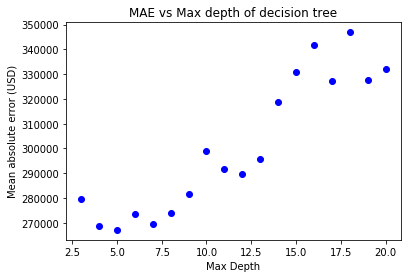

In [7]:
plt.plot(range(3,21), mae, 'bo')
#plt.legend([p1, p2], ['KNN accuracy', 'cross validation accuracy'], loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Mean absolute error (USD)')
plt.title('MAE vs Max depth of decision tree')
plt.show()

In [10]:
n = 8
# n is decision tree max depth
scoreTrain = []
scoreTest = []
#for i in range(20, 80, 20):
tree = DecisionTreeClassifier(criterion='entropy', max_depth=n, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=1-i/100.0)
tree = tree.fit(X, Y)
train_predict = tree.predict(X)
test_predict = tree.predict(X_test)
    
logerror = np.log(test_predict) - np.log(Y_test)

# visualization

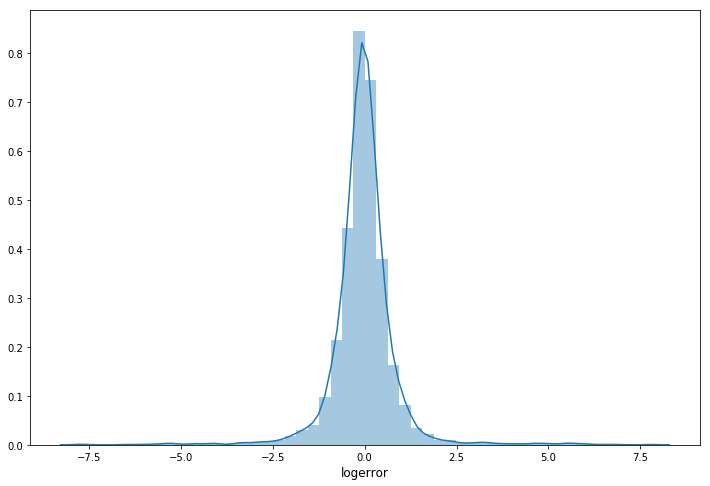

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(logerror , bins=50, kde=True)
plt.xlabel('logerror', fontsize=12)
plt.show()